# Avocado

The avocado (Persea americana), a tree likely originating from south central Mexico, is classified as a member of the flowering plant family Lauraceae.The fruit of the plant, also called an avocado (or avocado pear or alligator pear), is botanically a large berry containing a single large seed.

Commercially valuable with production increasing worldwide over 2018-26 at 10% per year,avocados are cultivated in tropical and Mediterranean climates of many countries.The fruit of domestic varieties has a buttery flesh when ripe. According to the variety, avocado skin has green, brown, purplish, or black skin when ripe, and the fruit may be pear-shaped, egg-shaped, or spherical. Commercially, the fruits are ripened after harvesting.

Avocado trees are partially self-pollinating, and are often propagated through grafting to maintain predictable fruit quality and quantity. In 2019, Mexico was the world's leading producer of avocados, supplying 32% of the global total.

# Content

This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. Here's how the Hass Avocado Board describes the data on their website:

> The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

# Dataset Information

Some relevant columns in the dataset:

1-Date - The date of the observation

2-AveragePrice - the average price of a single avocado

3-Type - conventional or organic

4-Year - the year

5-Region - the city or region of the observation

6-Total Volume - Total number of avocados sold

7- 4046 - Total number of avocados with PLU 4046 sold

8- 4225 - Total number of avocados with PLU 4225 sold

9- 4770 -Total number of avocados with PLU 4770 sold


# Inspiration /Label 

The dataset can be seen in two angles to find the city or region and find the average price .

# Task: Classification 

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')
import os 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, auc, roc_curve

In [2]:
# Load the dataset
avocado=pd.read_csv("avocado.csv")

In [3]:
avocado.head(15)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
5,5,2015-11-22,1.26,55979.78,1184.27,48067.99,43.61,6683.91,6556.47,127.44,0.0,conventional,2015,Albany
6,6,2015-11-15,0.99,83453.76,1368.92,73672.72,93.26,8318.86,8196.81,122.05,0.0,conventional,2015,Albany
7,7,2015-11-08,0.98,109428.33,703.75,101815.36,80.00,6829.22,6266.85,562.37,0.0,conventional,2015,Albany
8,8,2015-11-01,1.02,99811.42,1022.15,87315.57,85.34,11388.36,11104.53,283.83,0.0,conventional,2015,Albany
9,9,2015-10-25,1.07,74338.76,842.40,64757.44,113.00,8625.92,8061.47,564.45,0.0,conventional,2015,Albany


In [4]:
avocado.shape

(18249, 14)

There is 18249 rows and 14 columns in avocado dataset

In [5]:
avocado.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

# Cleaning Data Set

In [6]:
# Let's check the dataset type
avocado.dtypes

Unnamed: 0        int64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

In [7]:
# Let's check the null values in dataset
avocado.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

Hence, there is no null values in given dataset but we can see from above check that coloumn unamed is none of use, so we will drop that particular couloumn

In [8]:
del avocado['Unnamed: 0']
avocado.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')

In [9]:
# Get some statistics
avocado.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [10]:
# Unique occurrence of 'type'
avocado['type'].unique

<bound method Series.unique of 0        conventional
1        conventional
2        conventional
3        conventional
4        conventional
             ...     
18244         organic
18245         organic
18246         organic
18247         organic
18248         organic
Name: type, Length: 18249, dtype: object>

In [11]:
# Count of Unique occurrence of 'type'
avocado['type'].value_counts()

conventional    9126
organic         9123
Name: type, dtype: int64

In [12]:
# Unique occurrence of 'region'
avocado['region'].unique

<bound method Series.unique of 0                  Albany
1                  Albany
2                  Albany
3                  Albany
4                  Albany
               ...       
18244    WestTexNewMexico
18245    WestTexNewMexico
18246    WestTexNewMexico
18247    WestTexNewMexico
18248    WestTexNewMexico
Name: region, Length: 18249, dtype: object>

In [13]:
# Count of Unique occurrence of 'region'
avocado['region'].value_counts()

Chicago                338
Detroit                338
NewYork                338
Indianapolis           338
RaleighGreensboro      338
Southeast              338
SanDiego               338
SouthCentral           338
NorthernNewEngland     338
Pittsburgh             338
Nashville              338
Charlotte              338
Houston                338
Midsouth               338
Albany                 338
Louisville             338
Denver                 338
PhoenixTucson          338
GreatLakes             338
LosAngeles             338
Boston                 338
HarrisburgScranton     338
RichmondNorfolk        338
Jacksonville           338
Columbus               338
BuffaloRochester       338
NewOrleansMobile       338
LasVegas               338
MiamiFtLauderdale      338
California             338
HartfordSpringfield    338
Northeast              338
DallasFtWorth          338
Orlando                338
BaltimoreWashington    338
Atlanta                338
Plains                 338
C

# Data Analysis

Here we will check the below parameters and also look into others visualisation.

* How the average price changing over time?
* How does avocado type affect the pricing?

<Figure size 2160x2160 with 0 Axes>

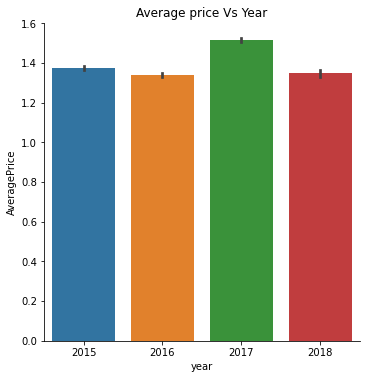

In [14]:
# set up a catagory plot
plt.figure(figsize=(30,30))
g=sns.catplot(x='year',y='AveragePrice',data=avocado, kind='bar')
plt.title('Average price Vs Year')

#show plot
plt.show()

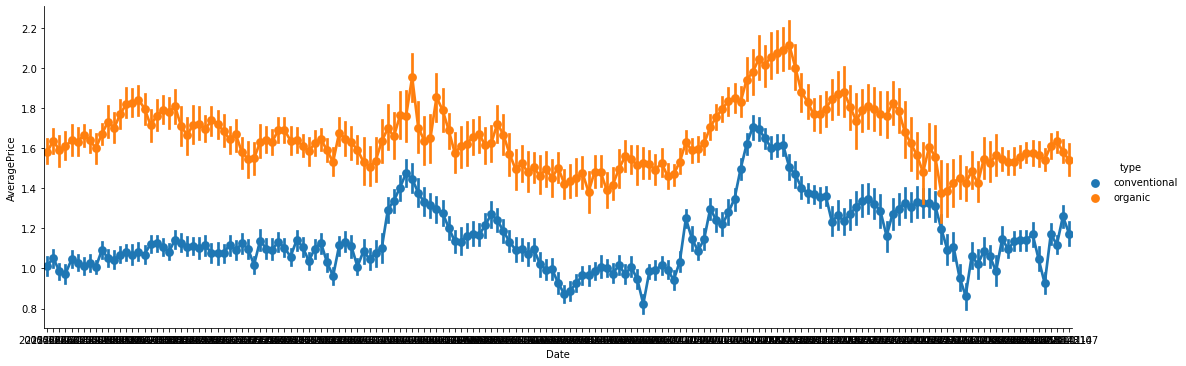

In [15]:
ax=sns.factorplot(x='Date', y='AveragePrice', data=avocado, hue='type',aspect=3)

From above observation we can see, How the average price changing over time?

<AxesSubplot:xlabel='type'>

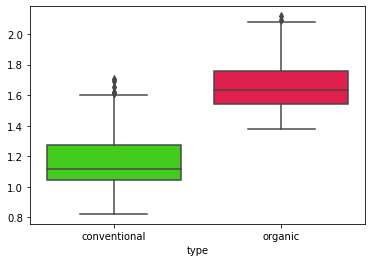

In [16]:
avocado_date_temp=avocado.pivot_table(index='Date', columns='type', aggfunc='mean')['AveragePrice']
sns.boxplot(data=avocado_date_temp, palette='prism')

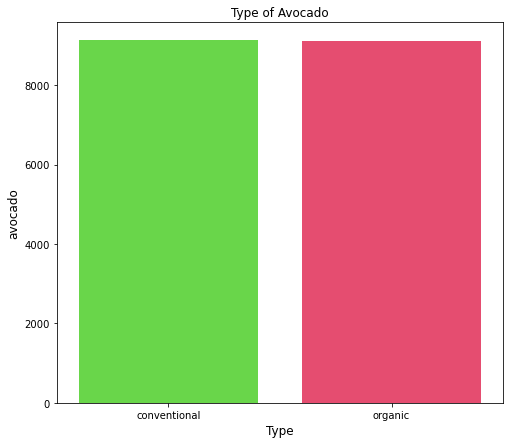

In [17]:
# Let's visualize the count of conventional using seaborn
avocado_type=avocado['type'].value_counts()
plt.figure(figsize=(8,7))
sns.barplot(avocado_type.index, avocado_type.values, alpha=0.8, palette="prism")
plt.ylabel('avocado', fontsize=12)
plt.xlabel('Type', fontsize=12)
plt.title('Type of Avocado')
plt.show()

<AxesSubplot:xlabel='type', ylabel='AveragePrice'>

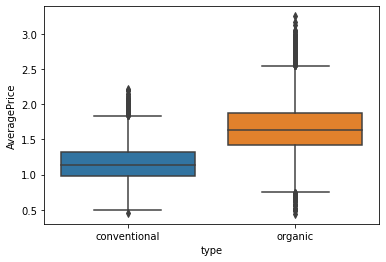

In [18]:
#Type of avocado vs Average price
sns.boxplot(x="type", y="AveragePrice", data=avocado)

From above we can see that, the price of organic avocado is almost 50% higher than conventional avocado.

<AxesSubplot:xlabel='region'>

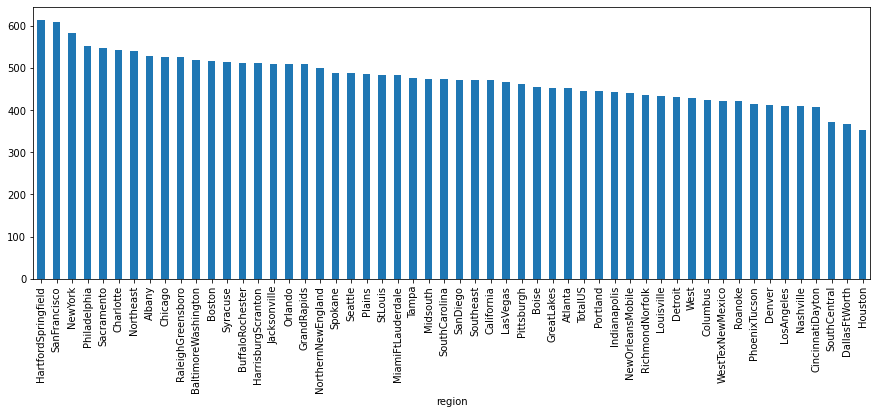

In [19]:
# Let's visualize Average price varies across regions

avocado.groupby("region")["AveragePrice"].sum().sort_values(ascending=False).plot(kind="bar",figsize=(15,5))

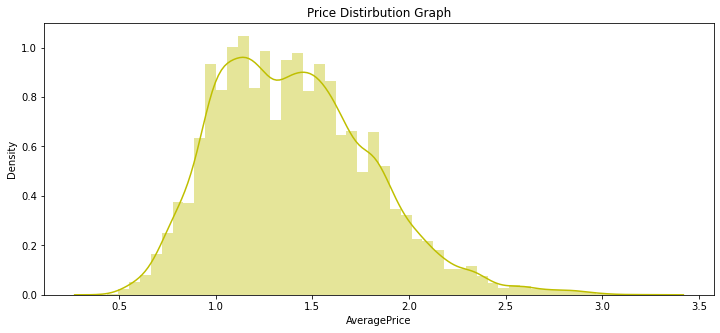

In [20]:
plt.figure(figsize=(12,5))
plt.title("Price Distirbution Graph")
ax = sns.distplot(avocado["AveragePrice"], color = 'y')

<AxesSubplot:xlabel='AveragePrice'>

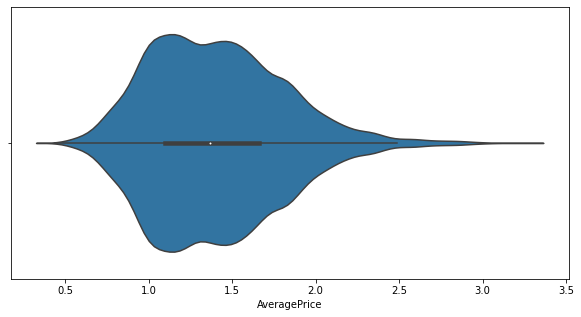

In [21]:
# Weight distribution of prices
import seaborn as sns
fig, ax = plt.subplots()
fig.set_size_inches(10,5)
sns.violinplot(avocado.dropna(subset = ['AveragePrice']).AveragePrice)

Text(0.5, 1.0, 'Average Price')

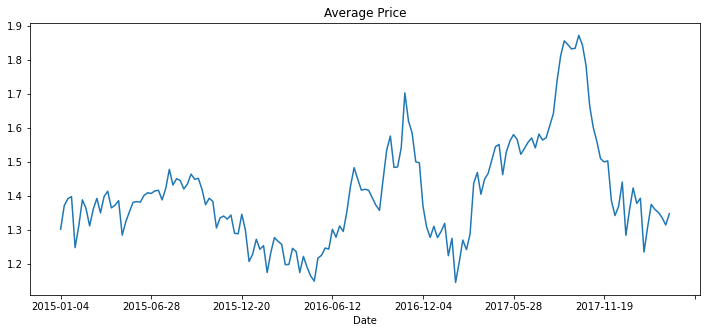

In [22]:
# Price distribution graph in general
Dategroup=avocado.groupby('Date').mean()
plt.figure(figsize=(12,5))
Dategroup['AveragePrice'].plot(x=avocado.Date)
plt.title('Average Price')

# Yearly average price in each region

Text(0.5, 1.0, 'Yearly Average Price in Each Region')

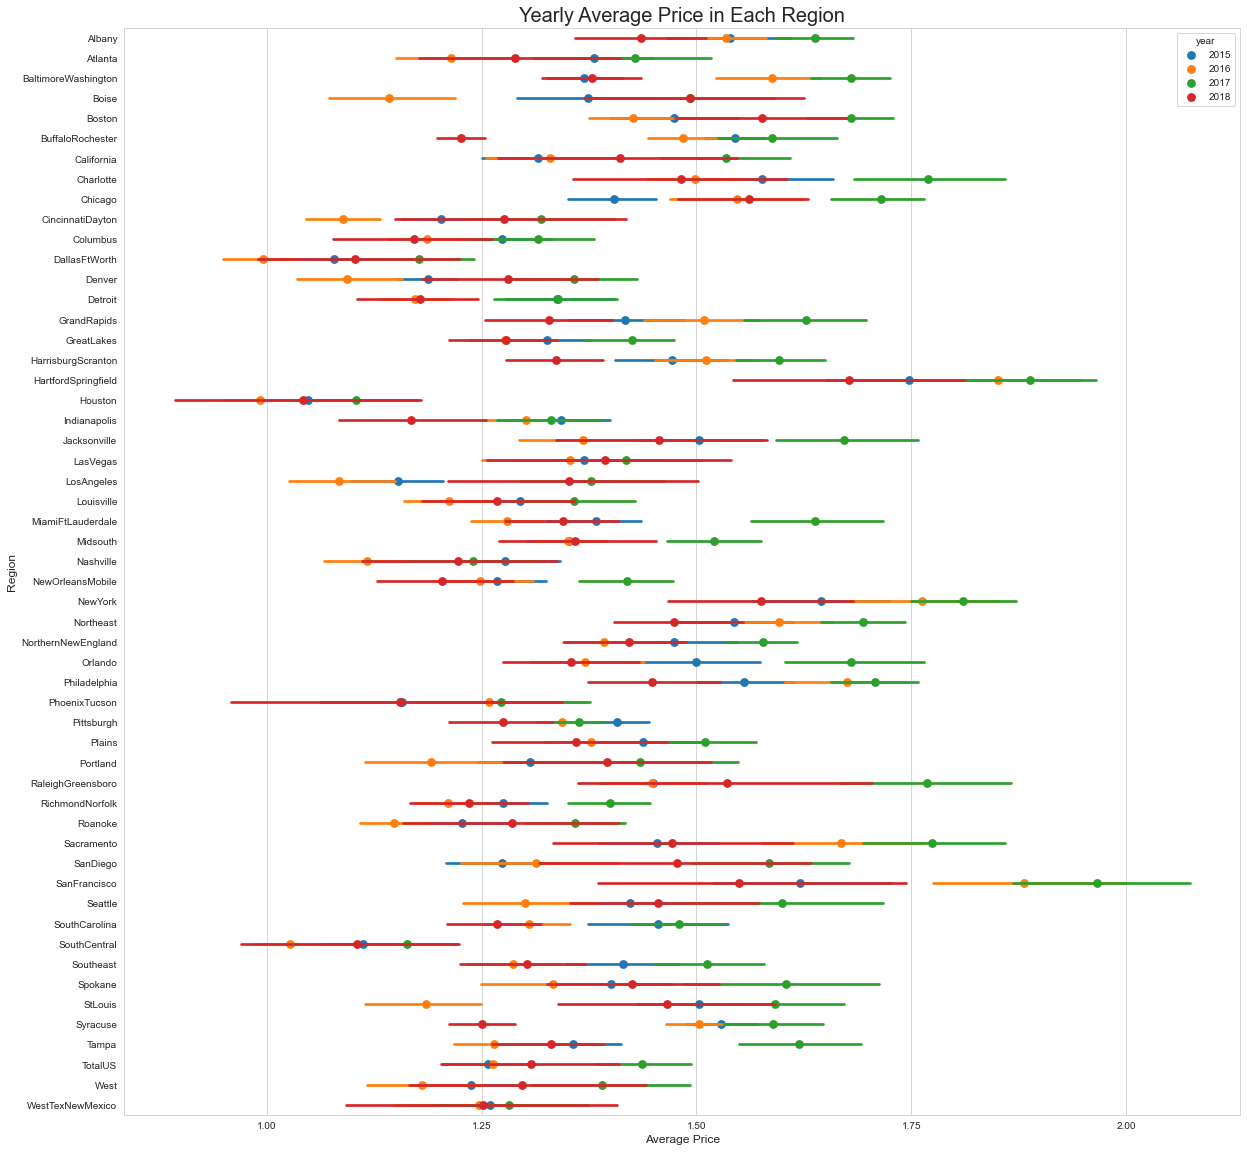

In [23]:
plt.figure(figsize=(20,20))
sns.set_style('whitegrid')
sns.pointplot(x='AveragePrice',y='region',data=avocado, hue='year',join=False)
plt.xticks(np.linspace(1,2,5))
plt.xlabel('Average Price',{'fontsize' : 'large'})
plt.ylabel('Region',{'fontsize':'large'})
plt.title("Yearly Average Price in Each Region",{'fontsize':20})

# Average price varies over years

<AxesSubplot:xlabel='year', ylabel='AveragePrice'>

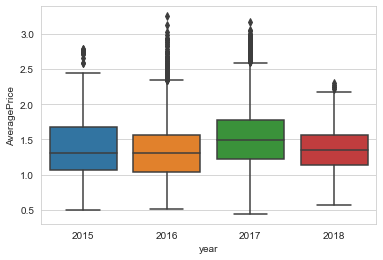

In [24]:
sns.boxplot(x="year", y="AveragePrice", data=avocado)

We notice the average price is high in 2017 compared to other years 

# Label Encoding "region" column to convert to numerical data

In [25]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
avocado['region'] = le.fit_transform(avocado['region'])
avocado.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,0
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,0
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,0
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,0
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,0


In [26]:
avocado.region.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53])

In [27]:
corr=avocado.corr()
corr

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region
AveragePrice,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,-0.174730,-0.172940,-0.117592,0.093197,-0.011716
Total Volume,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,0.747157,0.017193,0.174176
4046,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.699377,0.003353,0.192073
4225,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,0.688809,-0.009559,0.145726
4770,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,0.679861,-0.036531,0.095252
Total Bags,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,0.804233,0.071552,0.175256
Small Bags,-0.174730,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.806845,0.063915,0.164702
Large Bags,-0.172940,0.880640,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,0.710858,0.087891,0.198768
XLarge Bags,-0.117592,0.747157,0.699377,0.688809,0.679861,0.804233,0.806845,0.710858,1.000000,0.081033,0.082281
year,0.093197,0.017193,0.003353,-0.009559,-0.036531,0.071552,0.063915,0.087891,0.081033,1.000000,-0.000055


<AxesSubplot:>

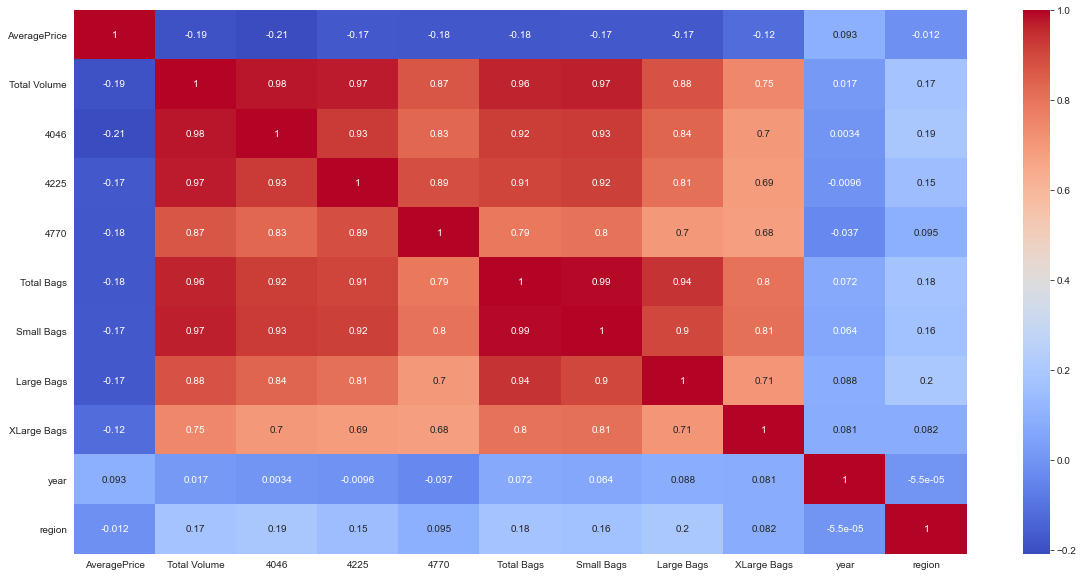

In [28]:
# visualize correlation between the variables using heatmap
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True , cmap='coolwarm')

# Classifying Type of Avocado

In [29]:
# Import libraries fore Classification & Regression
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

1- Logistic Regression

In [30]:
#Creating a new dataframe
avocado_new=avocado[["AveragePrice","Total Volume","region","type","Total Bags","year"]]

#feature columns
X=avocado_new[["AveragePrice","Total Volume","region","Total Bags","year"]]

#predictor variable
y=avocado_new.type

#create train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

print("X Train Shape ",X_train.shape)
print("Y Train Shape ",y_train.shape)

print("X Test Shape ",X_test.shape)
print("Y Test Shape ",y_test.shape)

X Train Shape  (14599, 5)
Y Train Shape  (14599,)
X Test Shape  (3650, 5)
Y Test Shape  (3650,)


In [31]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

y_pred_train = logreg.predict(X_train)  
y_pred_test = logreg.predict(X_test) 

#Accuracy score
print('Accuracy score for Logistic Regression test data is:', accuracy_score(y_test,y_pred_test))


Accuracy score for Logistic Regression test data is: 0.9084931506849315


In [32]:
#Confusion matrix

confusion_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred_test))
confusion_matrix.index = ['organic','Conventional']
confusion_matrix.columns = ['Predicted organic','Predicted Conventional']
print("Confusion matrix for logistic regression model")
print(confusion_matrix)

Confusion matrix for logistic regression model
              Predicted organic  Predicted Conventional
organic                    1586                     262
Conventional                 72                    1730


In [46]:
# Cross Validation
from sklearn.model_selection import cross_val_score

score=cross_val_score(logreg, X,y, cv=5, scoring='accuracy')
print(score)
print("Mean:", score.mean())
print('Std:', score.std())

[0.92657534 0.89589041 0.90465753 0.8909589  0.89421759]
Mean: 0.9024599571284307
Std: 0.012882164917437792


# Random forest classfier

In [33]:

model = RandomForestClassifier(random_state = 0)

model.fit(X_train, y_train)
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

In [34]:
#Accuracy score
print('Accuracy score for test data using Random Forest :', accuracy_score(y_test,y_pred_test))


Accuracy score for test data using Random Forest : 0.9961643835616438


In [35]:
#Confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred_test))
confusion_matrix.index = ['organic','Conventional']
confusion_matrix.columns = ['Predicted organic','Predicted Conventional']
print("Confusion matrix for Random forest model")
print(confusion_matrix)

Confusion matrix for Random forest model
              Predicted organic  Predicted Conventional
organic                    1840                       8
Conventional                  6                    1796


In [45]:
# Cross Validation
from sklearn.model_selection import cross_val_score

score=cross_val_score(model, X,y, cv=5, scoring='accuracy')
print(score)
print("Mean:", score.mean())
print('Std:', score.std())

[0.97808219 0.97260274 0.99068493 0.96821918 0.98081666]
Mean: 0.9780811406390193
Std: 0.007663025577926389


# Decision Tree classifier

In [36]:
dtc=DecisionTreeClassifier(random_state = 0)

dtc.fit(X_train, y_train)
y_pred_train = dtc.predict(X_train)
y_pred_test = dtc.predict(X_test)

In [37]:
#Accuracy score
print('Accuracy score for test data using Decision Tree :', accuracy_score(y_test,y_pred_test))


Accuracy score for test data using Decision Tree : 0.9917808219178083


In [38]:
#Confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred_test))
confusion_matrix.index = ['organic','Conventional']
confusion_matrix.columns = ['Predicted organic','Predicted Conventional']
print("Confusion matrix for Decision Tree model")
print(confusion_matrix)

Confusion matrix for Decision Tree model
              Predicted organic  Predicted Conventional
organic                    1834                      14
Conventional                 16                    1786


In [44]:
# Cross Validation
from sklearn.model_selection import cross_val_score

score=cross_val_score(dtc, X,y, cv=5, scoring='accuracy')
print(score)
print("Mean:", score.mean())
print('Std:', score.std())

[0.9860274  0.96849315 0.97315068 0.96493151 0.9591669 ]
Mean: 0.9703539269531529
Std: 0.009071872329264347


# Support vector machine model

In [39]:
from sklearn.svm import SVC
svc=SVC(random_state = 0)

svc.fit(X_train, y_train)
y_pred_train = svc.predict(X_train)
y_pred_test = svc.predict(X_test)

In [40]:
#Accuracy score
print('Accuracy score for test data using Support Vector :', accuracy_score(y_test,y_pred_test))


Accuracy score for test data using Support Vector : 0.9038356164383562


In [41]:
#Confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred_test))
confusion_matrix.index = ['organic','Conventional']
confusion_matrix.columns = ['Predicted organic','Predicted Conventional']
print("Confusion matrix for Support Vector model")
print(confusion_matrix)

Confusion matrix for Support Vector model
              Predicted organic  Predicted Conventional
organic                    1598                     250
Conventional                101                    1701


In [43]:
# Cross Validation
from sklearn.model_selection import cross_val_score

score=cross_val_score(svc, X,y, cv=5, scoring='accuracy')
print(score)
print("Mean:", score.mean())
print('Std:', score.std())

[0.89835616 0.88191781 0.92328767 0.87972603 0.88407783]
Mean: 0.8934731001550433
Std: 0.01626979321215723


As we get Highest accuracy rate in Random Forest Classifier, We save it as a best model

In [47]:
# Saving This Random Forest Classifier
import joblib

# Save the model as a pickle in a file
joblib.dump(model,'Hr_employee_Attrition_model.pkl')

['Hr_employee_Attrition_model.pkl']